# Title:  Tech layoffs 2020 - 2024



Authors: Deborah Shaw, Nicole Al-Sabah, Chika Starks

GitHub Link: https://github.com/nmalsabah/CST-383-Final-Project

## Project Idea:

Our project aims to analyze tech layoffs from 2020 to 2024 and determine how company characteristics influence layoffs. As computer science students, we want insights into job security and which employers might be safer options upon graduation.

We will predict the number of employees laid off (Laid_Off) based on factors such as:

*   Company size before layoffs (Company_Size_before_Layoffs)
*   Industry (Industry)
*   Maturity stage (Stage) (e.g., startup, post-IPO, acquired)
*   Total funding raised (Money_Raised_in_$_mil)
*   Percentage of workforce laid off (Percentage)
*   Year when layoffs occured (Year)
*   Country where layoffs took place (Country)

By examining these factors, we aim to identify patterns that influence layoffs and determine which industries or company types experience the most significant workforce reductions. Our approach will involve data cleaning, correlation analysis, and visualization to understand patterns before predicting laid off (Laid_Off). We will exclude latitude (lat), longitude (lng), and date (Date_layoffs) fields as direct inputs.

# Dataset Overview

We are using a dataset from [Kaggle](https://www.kaggle.com/datasets/ulrikeherold/tech-layoffs-2020-2024) that tracks tech layoffs from 2020 to 2024 across various industries. Our goal is to predict the number of employees laid off (Laid_Off) based on several company characteristics.

Before exploring into data analysis, let's inspect the dataset and identify any initial data quality issues.


In [1]:
#!pip install --upgrade --force-reinstall kagglehub
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, classification_report
import kagglehub
from kagglehub import KaggleDatasetAdapter
import warnings

In [2]:
# Ignore warning for load_dataset
warnings.simplefilter("ignore", DeprecationWarning)

# Read the data
file_path = "tech_layoffs.xlsx"
df = kagglehub.load_dataset(KaggleDatasetAdapter.PANDAS, "ulrikeherold/tech-layoffs-2020-2024", file_path)

100%|██████████| 182k/182k [00:00<00:00, 1.92MB/s]


## Initial Inspection of Data:



In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1672 entries, 0 to 1671
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   #                            1672 non-null   int64         
 1   Company                      1672 non-null   object        
 2   Location_HQ                  1672 non-null   object        
 3   Country                      1672 non-null   object        
 4   Continent                    1672 non-null   object        
 5   Laid_Off                     1565 non-null   float64       
 6   Date_layoffs                 1672 non-null   datetime64[ns]
 7   Percentage                   1570 non-null   float64       
 8   Company_Size_before_Layoffs  1511 non-null   float64       
 9   Company_Size_after_layoffs   1536 non-null   float64       
 10  Industry                     1672 non-null   object        
 11  Stage                        1672 non-null 

In [4]:
df.describe()

,#,Laid_Off,Date_layoffs,Percentage,Company_Size_before_Layoffs,Company_Size_after_layoffs,Year,lat,lng
count,1672.000000,1565.000000,1672,1570.000000,1511.000000,1536.000000,1672.000000,1672.000000,1672.000000
mean,2064.454545,278.387859,2022-08-06 04:08:02.296650752,22.908014,3656.882859,3319.764757,2022.200957,34.347327,-59.878868
min,3.000000,3.000000,2020-03-12 00:00:00,0.044980,4.000000,0.000000,2020.000000,-41.286640,-123.262044
25%,1209.750000,40.000000,2022-05-27 00:00:00,9.060269,218.000000,150.000000,2022.000000,34.052230,-122.325530
50%,2188.500000,87.000000,2022-11-17 00:00:00,15.000000,553.000000,424.000000,2022.000000,37.774930,-79.398640
75%,2990.250000,200.000000,2023-06-14 00:00:00,28.000000,1500.000000,1200.000000,2023.000000,42.358430,-0.125740
max,3537.000000,12000.000000,2024-03-28 00:00:00,100.000000,400000.000000,392000.000000,2024.000000,60.204767,174.775570
std,1023.379865,886.840962,NaN,22.639925,21855.230097,21048.185867,1.302412,18.010614,74.139291


In [5]:
df.head()

,#,Company,Location_HQ,Country,Continent,Laid_Off,Date_layoffs,Percentage,Company_Size_before_Layoffs,Company_Size_after_layoffs,Industry,Stage,Money_Raised_in_$_mil,Year,lat,lng
0,3,ShareChat,Bengaluru,India,Asia,200.0,2023-12-20,15.0,1333.0,1133.0,Consumer,Series H,$1700,2023,12.97194,77.59369
1,4,InSightec,Haifa,Israel,Asia,100.0,2023-12-19,20.0,500.0,400.0,Healthcare,Unknown,$733,2023,32.81841,34.98850
2,6,Enphase Energy,San Francisco Bay Area,USA,North America,350.0,2023-12-18,10.0,3500.0,3150.0,Energy,Post-IPO,$116,2023,37.54827,-121.98857
3,7,Udaan,Bengaluru,India,Asia,100.0,2023-12-18,10.0,1000.0,900.0,Retail,Unknown,NaN,2023,12.97194,77.59369
4,14,Cruise,San Francisco Bay Area,USA,North America,900.0,2023-12-14,24.0,3750.0,2850.0,Transportation,Acquired,$15000,2023,37.77493,-122.41942


## Missing Data Heatmap

Visualizing missing values helps identify problematic features that may need imputation or removal.

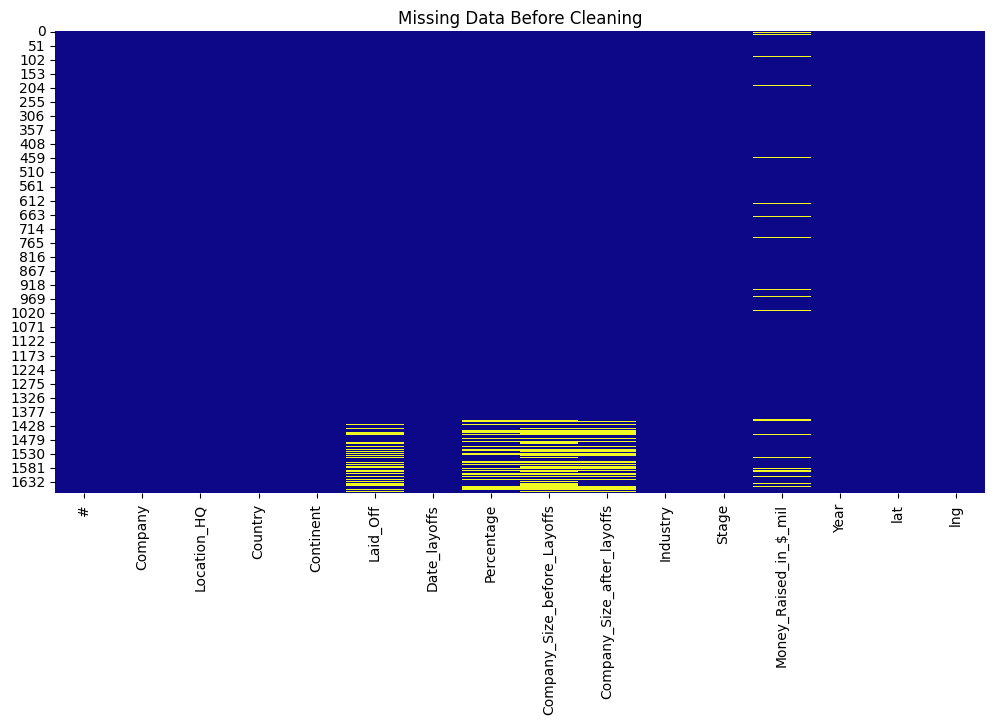

In [6]:
# Visualizing missing data
# Cite for heatmap: https://medium.com/@HildaPosada/finding-and-visualizing-missing-data-in-python-using-missingno-and-seaborn-d4cf0452b9e9
# Cite for colormap: https://matplotlib.org/stable/users/explain/colors/colormaps.html
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="plasma")
plt.title("Missing Data Before Cleaning")
plt.show()

# Prediction

'Laid_Off' (as suggested from the project proposal). We aim to identify patterns in layoffs and determine which industries or company types experience the most significant workforce decreases after layoffs.

## Features (what features you plan to use as predictors):

*   Company_Size_before_Layoffs
*   Money_Raised_in_$_mil
*   Industry
*   Stage
*   Percentage
*   Country
*   Year


# Pre-processing:

*   Drop unnecessary columns
*   Check for missing data
*   Clean monetary values by removing non-numeric characters
*   Fill in missing data values
*   Store original labels to use for visualization
*   Change categorical text values to numerical inputs





In [7]:
# Drop unnecessary columns
df.drop(columns=["lat", "lng", "Date_layoffs"], inplace=True)

In [8]:
# Check for missing data
df.isnull().sum()

,0
#,0
Company,0
Location_HQ,0
Country,0
Continent,0
Laid_Off,107
Percentage,102
Company_Size_before_Layoffs,161
Company_Size_after_layoffs,136
Industry,0


In [9]:
# Clean monetary values by removing non-numeric characters
df['Money_Raised_in_$_mil'] = df['Money_Raised_in_$_mil'].astype(str).replace({'\$': '', ',': ''}, regex=True).astype(float)

In [10]:
# Fill in missing data values
# Maintain dataset integrity and avoid errors
df = df.fillna({
    "Company_Size_before_Layoffs": df["Company_Size_before_Layoffs"].median(),
    "Company_Size_after_layoffs": df["Company_Size_after_layoffs"].median(),
    "Money_Raised_in_$_mil": 0, # Filling in 0 for missing funds
    "Laid_Off": df["Laid_Off"].median(),
    "Percentage": df["Percentage"].median()
})

In [11]:
# Store original labels to use for visualization
df["Industry_Label"] = df["Industry"]
df["Country_Label"] = df["Country"]
df["Stage_Label"] = df["Stage"]

In [12]:
# Change categorical text values to numerical inputs
label_encoder_industry = LabelEncoder()
label_encoder_country = LabelEncoder()
label_encoder_stage = LabelEncoder()

df["Industry"] = label_encoder_industry.fit_transform(df["Industry"])
df["Country"] = label_encoder_country.fit_transform(df["Country"])
df["Stage"] = label_encoder_stage.fit_transform(df["Stage"])

# Exploration and Visualization After Data Cleaning

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1672 entries, 0 to 1671
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   #                            1672 non-null   int64  
 1   Company                      1672 non-null   object 
 2   Location_HQ                  1672 non-null   object 
 3   Country                      1672 non-null   int64  
 4   Continent                    1672 non-null   object 
 5   Laid_Off                     1672 non-null   float64
 6   Percentage                   1672 non-null   float64
 7   Company_Size_before_Layoffs  1672 non-null   float64
 8   Company_Size_after_layoffs   1672 non-null   float64
 9   Industry                     1672 non-null   int64  
 10  Stage                        1672 non-null   int64  
 11  Money_Raised_in_$_mil        1672 non-null   float64
 12  Year                         1672 non-null   int64  
 13  Industry_Label    

In [14]:
df.describe()

,#,Country,Laid_Off,Percentage,Company_Size_before_Layoffs,Company_Size_after_layoffs,Industry,Stage,Money_Raised_in_$_mil,Year
count,1672.000000,1672.000000,1672.000000,1672.000000,1672.000000,1672.000000,1672.000000,1672.000000,1672.000000,1672.000000
mean,2064.454545,31.093900,266.139952,22.425587,3358.004187,3084.224083,17.359450,6.446770,744.822368,2022.200957
std,1023.379865,12.956823,859.255943,22.019603,20795.877028,20189.004702,9.170536,4.949008,4712.957580,1.302412
min,3.000000,0.000000,3.000000,0.044980,4.000000,0.000000,0.000000,0.000000,0.000000,2020.000000
25%,1209.750000,18.000000,40.750000,10.000000,250.000000,165.000000,9.000000,1.000000,50.000000,2022.000000
50%,2188.500000,39.000000,87.000000,15.000000,553.000000,424.000000,15.000000,6.000000,167.000000,2022.000000
75%,2990.250000,39.000000,180.000000,25.000000,1267.000000,1080.000000,26.000000,9.000000,468.250000,2023.000000
max,3537.000000,41.000000,12000.000000,100.000000,400000.000000,392000.000000,33.000000,16.000000,121900.000000,2024.000000


In [15]:
df.head()

,#,Company,Location_HQ,Country,Continent,Laid_Off,Percentage,Company_Size_before_Layoffs,Company_Size_after_layoffs,Industry,Stage,Money_Raised_in_$_mil,Year,Industry_Label,Country_Label,Stage_Label
0,3,ShareChat,Bengaluru,15,Asia,200.0,15.0,1333.0,1133.0,4,12,1700.0,2023,Consumer,India,Series H
1,4,InSightec,Haifa,18,Asia,100.0,20.0,500.0,400.0,14,16,733.0,2023,Healthcare,Israel,Unknown
2,6,Enphase Energy,San Francisco Bay Area,39,North America,350.0,10.0,3500.0,3150.0,8,1,116.0,2023,Energy,USA,Post-IPO
3,7,Udaan,Bengaluru,15,Asia,100.0,10.0,1000.0,900.0,27,16,0.0,2023,Retail,India,Unknown
4,14,Cruise,San Francisco Bay Area,39,North America,900.0,24.0,3750.0,2850.0,31,0,15000.0,2023,Transportation,USA,Acquired


## Missing Data Check After Cleaning



In [16]:
# Verify no more missing values
df.isnull().sum()

,0
#,0
Company,0
Location_HQ,0
Country,0
Continent,0
Laid_Off,0
Percentage,0
Company_Size_before_Layoffs,0
Company_Size_after_layoffs,0
Industry,0


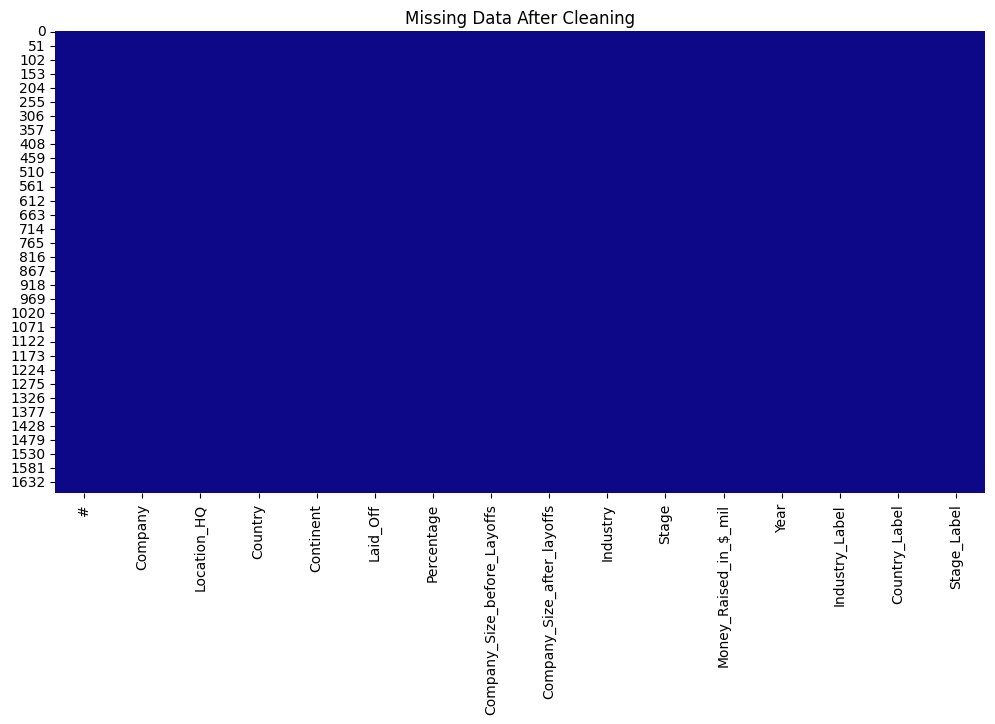

In [17]:
# Visualization confirming no missing values remain
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="plasma")
plt.title("Missing Data After Cleaning")
plt.show()

## Exploration Visuals After Cleaning



Industry Layoff Data (Before & After Layoffs):

                Company_Size_before_Layoffs  Company_Size_after_layoffs
Industry_Label                                                         
AI                                      850                         680
Aerospace                             2,261                       1,478
Construction                         19,658                      15,955
Construct…                              553                         424
Consumer                            505,946                     448,350
Crypto                               50,935                      40,330
Data                                 63,707                      57,549
Education                           120,291                     111,649
Energy                               18,658                      15,323
Finance                             258,466                     222,972
Fitness                              43,319                      34,604
Food           

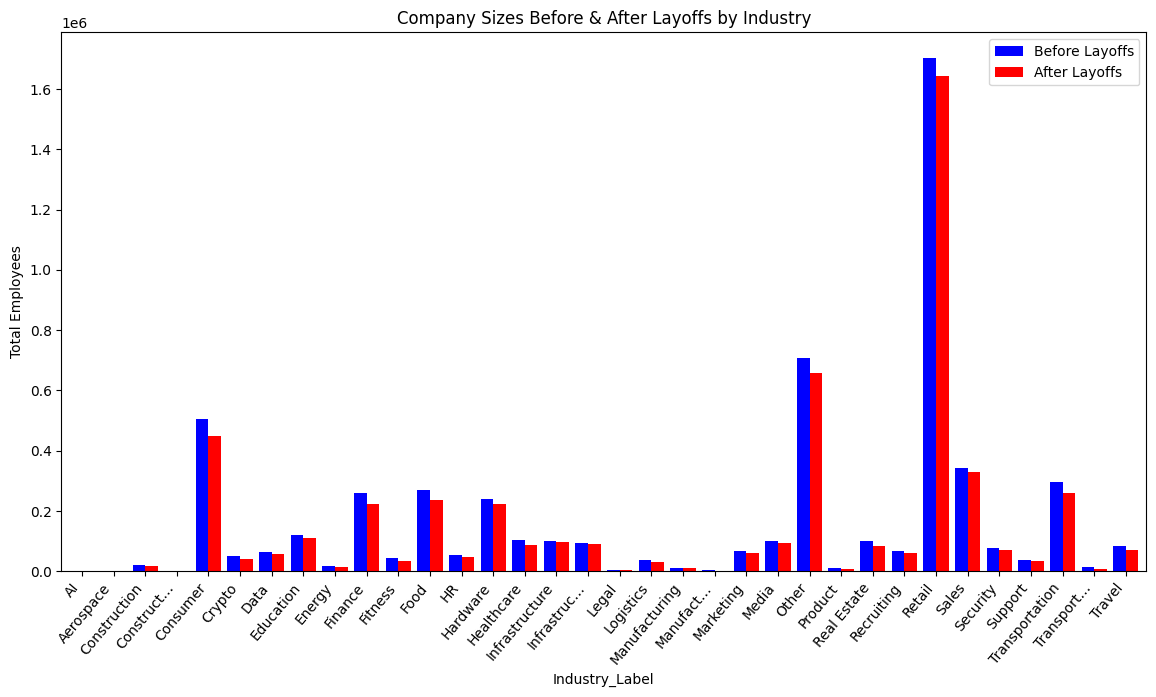

In [18]:
# Company Sizes Before & After Layoffs by Industry
industry_layoffs_raw = df.groupby("Industry_Label")[["Company_Size_before_Layoffs", "Company_Size_after_layoffs"]].sum()
pd.options.display.float_format = '{:,.0f}'.format
print("\nIndustry Layoff Data (Before & After Layoffs):\n")
print(industry_layoffs_raw)

industry_layoffs = df.groupby("Industry_Label")[["Company_Size_before_Layoffs", "Company_Size_after_layoffs"]].sum()
industry_layoffs.plot(kind="bar", color=["blue", "red"], width=0.8, figsize=(14,7))
plt.ylabel("Total Employees")
plt.title("Company Sizes Before & After Layoffs by Industry")
plt.legend(["Before Layoffs", "After Layoffs"])
plt.xticks(rotation=50, ha="right")
plt.show()

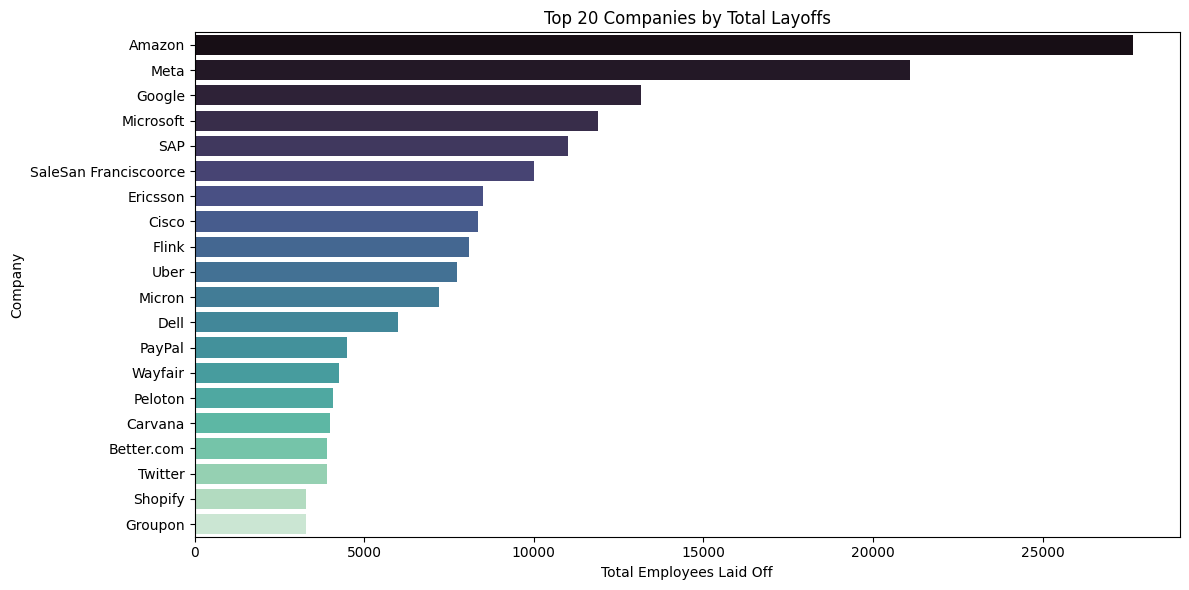

In [19]:
# Top 20 companies with the most layoffs
company_layoffs = df.groupby('Company')['Laid_Off'].sum().sort_values(ascending=False).head(20)

plt.figure(figsize=(12, 6))
sns.barplot(x=company_layoffs.values, y=company_layoffs.index, hue=company_layoffs.index, palette="mako", legend=False)
plt.title("Top 20 Companies by Total Layoffs")
plt.xlabel("Total Employees Laid Off")
plt.ylabel("Company")
plt.tight_layout()
plt.show()

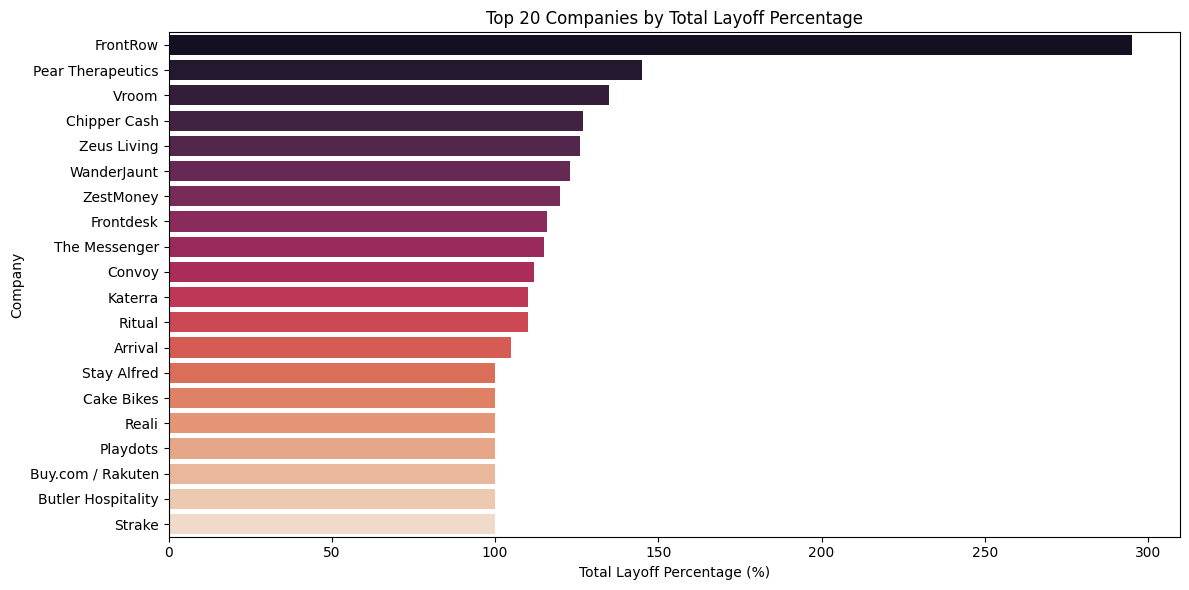

In [20]:
# Calculate total layoff percentage by company
total_layoff_percentage = df.groupby('Company')['Percentage'].sum().sort_values(ascending=False).head(20)

plt.figure(figsize=(12, 6))
sns.barplot(x=total_layoff_percentage.values, y=total_layoff_percentage.index, hue=total_layoff_percentage.index, palette="rocket", legend=False)
plt.title("Top 20 Companies by Total Layoff Percentage")
plt.xlabel("Total Layoff Percentage (%)")
plt.ylabel("Company")
plt.tight_layout()
plt.show()

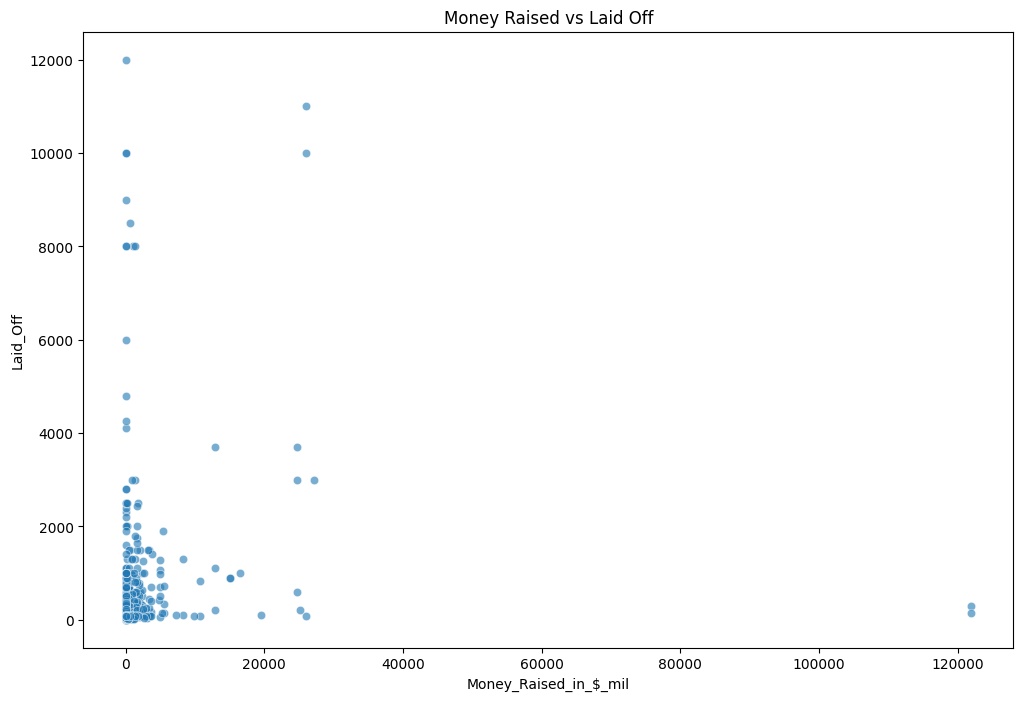

In [21]:
# Relationship between Money Raised vs Laid Off
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Money_Raised_in_$_mil', y='Laid_Off', data=df, alpha=0.6)
plt.title('Money Raised vs Laid Off')
plt.show()

# Feature Engineering and Model Implementation

## Findings for Linear Regression vs Random Forest Predictions:
- First tried Linear Regression to predict layoffs, but the model didn’t perform well.
- The R-squared score was very low (0.03), showing the predictions were not accurate.
- Layoffs are likely influenced by multiple non-linear factors and complex feature interactions.
- Switched to Random Forest, which improved predictions significantly.
- The R-squared score increased to 0.79, showing a much better fit for the data.
- Cite: https://www.geeksforgeeks.org/random-forest-algorithm-in-machine-learning/

Linear Regression R-squared (Train): 0.54
Linear Regression R-squared (Test): 0.03

Feature Importance (Linear Regression):
Money_Raised_in_$_mil: 0.03
Percentage: 1.40
Company_Size_before_Layoffs: 0.03
Year: 9.41
Industry: -3.24
Stage: -13.02
Country: 0.46


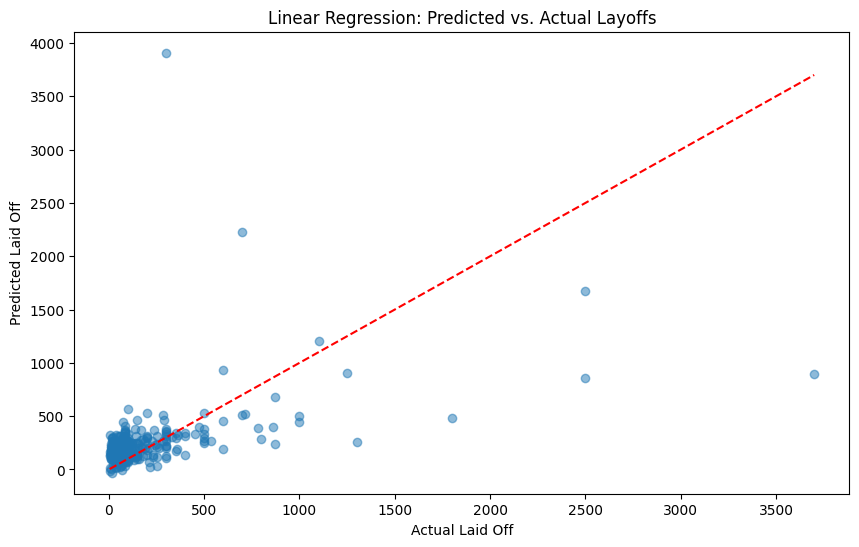

In [22]:
# Linear Regression Prediction: Predicted vs. Actual Layoffs

X = df[['Money_Raised_in_$_mil', 'Percentage', 'Company_Size_before_Layoffs', 'Year', 'Industry', 'Stage', 'Country']]
y = df['Laid_Off']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

r2_train_lr = lr.score(X_train, y_train)
r2_test_lr = lr.score(X_test, y_test)

print(f"Linear Regression R-squared (Train): {r2_train_lr:.2f}")
print(f"Linear Regression R-squared (Test): {r2_test_lr:.2f}")

# Print feature importance for Linear Regression
importances = lr.coef_
print("\nFeature Importance (Linear Regression):")
for feature, importance in zip(['Money_Raised_in_$_mil', 'Percentage', 'Company_Size_before_Layoffs', 'Year', 'Industry', 'Stage', 'Country'], importances):
    print(f"{feature}: {importance:.2f}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='dashed')
plt.xlabel("Actual Laid Off")
plt.ylabel("Predicted Laid Off")
plt.title("Linear Regression: Predicted vs. Actual Layoffs")
plt.show()

Random Forest R-squared (Train): 0.97
Random Forest R-squared (Test): 0.79

Feature Importance (Random Forest):
Money_Raised_in_$_mil: 0.02
Percentage: 0.13
Company_Size_before_Layoffs: 0.78
Year: 0.01
Industry: 0.04
Stage: 0.01
Country: 0.01


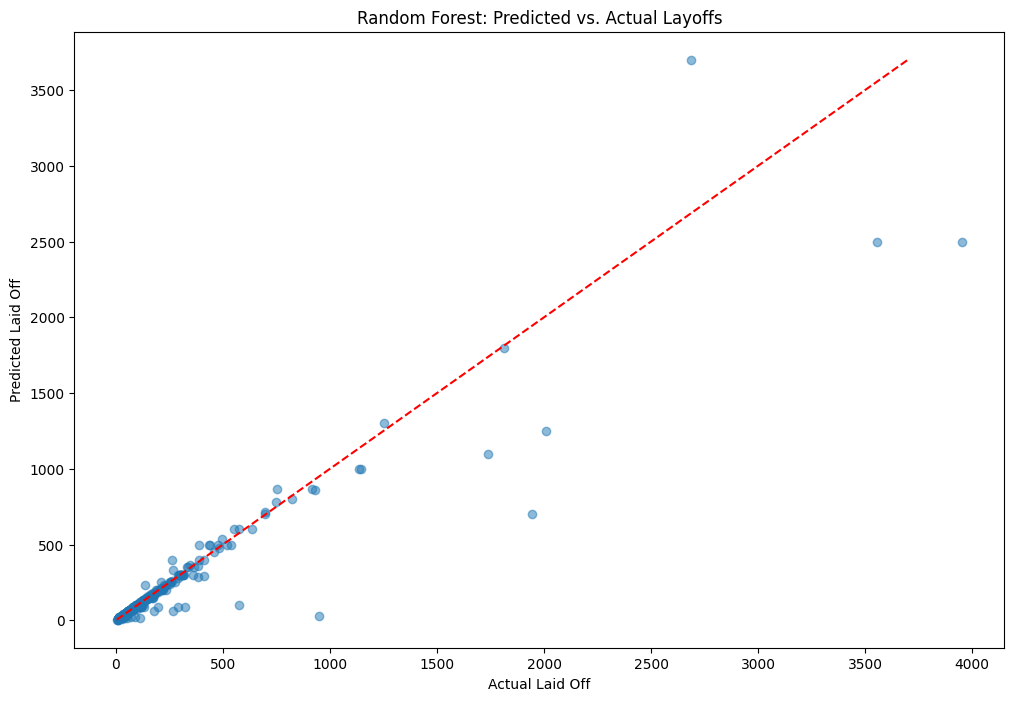

In [23]:
# Random Forest Prediction: Predicted vs. Actual Layoffs

X = np.array(df[['Money_Raised_in_$_mil', 'Percentage', 'Company_Size_before_Layoffs', 'Year', 'Industry', 'Stage', 'Country']])
y = np.array(df['Laid_Off'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

r2_train_rf = rf.score(X_train, y_train)
r2_test_rf = rf.score(X_test, y_test)

print("Random Forest R-squared (Train): {:.2f}".format(r2_train_rf))
print("Random Forest R-squared (Test): {:.2f}".format(r2_test_rf))

# Print feature importance for Random Forest
importances = rf.feature_importances_
print("\nFeature Importance (Random Forest):")
for feature, importance in zip(['Money_Raised_in_$_mil', 'Percentage', 'Company_Size_before_Layoffs', 'Year', 'Industry', 'Stage', 'Country'], importances):
    print(f"{feature}: {importance:.2f}")

plt.figure(figsize=(12, 8))
plt.scatter(y_pred_rf, y_test, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='dashed')
plt.xlabel("Actual Laid Off")
plt.ylabel("Predicted Laid Off")
plt.title("Random Forest: Predicted vs. Actual Layoffs")
plt.show()

## Feature Importance vs. Correlation

We initially attempted to analyze the correlation between each feature and Laid_Off. However, the linear correlation analysis did not reveal any meaningful relationships, likely due to the data being non-linear.

Instead, we used feature importance scores from the Random Forest model. The feature importance analysis revealed that factors such as Company_Size_before_Layoffs, Percentage, and Industry had the most significant impact on predicting layoffs.

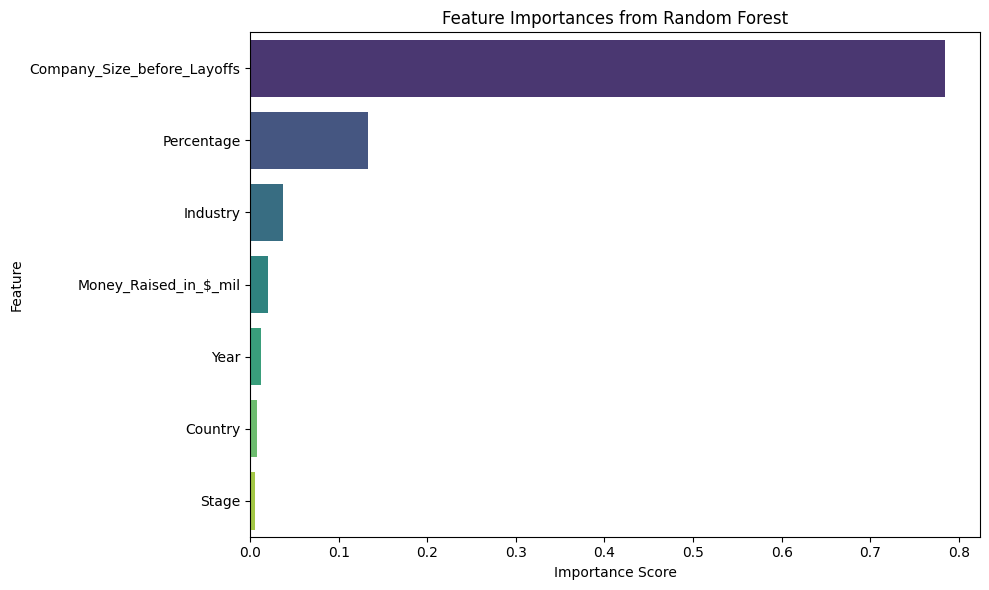

In [24]:
feature_names = ['Money_Raised_in_$_mil', 'Percentage', 'Company_Size_before_Layoffs', 'Year', 'Industry', 'Stage', 'Country']

# Create a DataFrame for feature importances
importances = rf.feature_importances_
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, hue='Feature', palette="viridis", legend=False)
plt.title("Feature Importances from Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# Discussion of Results

The Random Forest model significantly outperformed the Linear Regression model, with an R² score increasing from 0.03 to 0.79. This improvement is likely due to Random Forest’s ability to handle non-linear relationships and interactions between variables, which is recognized in layoffs data.

The feature importance analysis revealed that:
- For **Linear Regression**, the most significant factors influencing layoffs were:
  - **Stage** (-13.02): Mature companies (e.g., post-IPO) experienced fewer layoffs.
  - **Year** (9.41): Layoffs increased significantly in more recent years.
  - **Percentage** (1.40): A higher layoff percentage was moderately associated with larger layoffs.

- For **Random Forest**, the most influential factors were:
  - **Company_Size_before_Layoffs** (0.78): Larger companies experienced higher numbers of layoffs.
  - **Percentage** (0.13): Higher layoff percentages also contributed to predicting layoffs, but to a lesser extent.
  - Other features had minimal impact compared to these two.

These results align with observed trends in the tech industry. For example, startups often face higher volatility compared to more established companies.

**Future Research Suggestions:**
- Incorporate time-series analysis using monthly data.
- Explore deep learning models for better pattern recognition.
- Utilize more specific data, such as employee roles or company revenue.


# Summary

This project analyzed tech layoffs from 2020 to 2024 and successfully predicted layoffs using a Random Forest model.

The main findings were:
- The Random Forest model achieved an R² score of 0.79, outperforming Linear Regression.
- Company Size Before Layoffs and Percentage were the most influential factors.
- Industry trends suggest that startups and specific divisions (such as retail and consumer) are more vulnerable. As well as larger companies tend to have more frequent layoffs.

These findings provide valuable insights for students and job seekers in the tech industry. Also, may help companies understand the factors contributing to workforce reductions.